In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
df = pd.read_csv("./data/flight_data.csv")

df = df.drop(columns=['Unnamed: 0'])

df['departure_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['arrival_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['airline'] = df['airline'].replace({
    "GO_FIRST": "GO FIRST",
    "Air_India": "Air India",
})
df['stops'] = df['stops'].replace({
    "zero": "0",
    "one": "1",
    "two_or_more": ">2",
})

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Evening,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Morning,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Morning,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Afternoon,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,10.00,49,81585


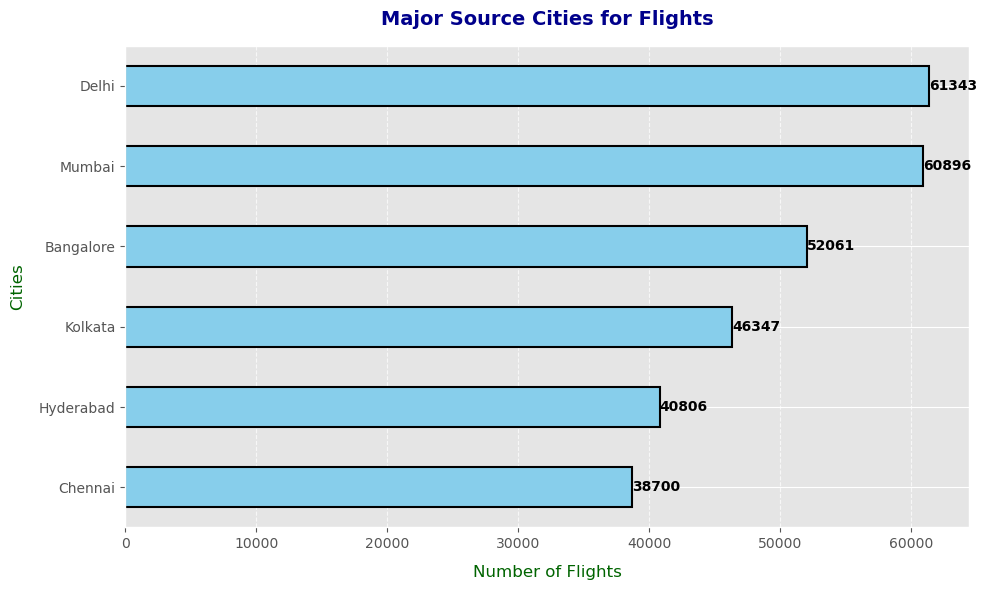

In [3]:
plt.figure(figsize=(10, 6))
ax = df['source_city'].value_counts(ascending=True) \
                      .plot(kind='barh', color='skyblue', edgecolor='black', linewidth=1.5)

plt.title("Major Source Cities for Flights", fontsize=14, fontweight='bold', pad=15, color='darkblue')
ax.set_xlabel("Number of Flights", fontsize=12, labelpad=10, color='darkgreen')
ax.set_ylabel("Cities", fontsize=12, labelpad=10, color='darkgreen')

plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(ax.patches):
    ax.text(v.get_width() + 10, v.get_y() + v.get_height()/2, f"{int(v.get_width())}", 
            ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


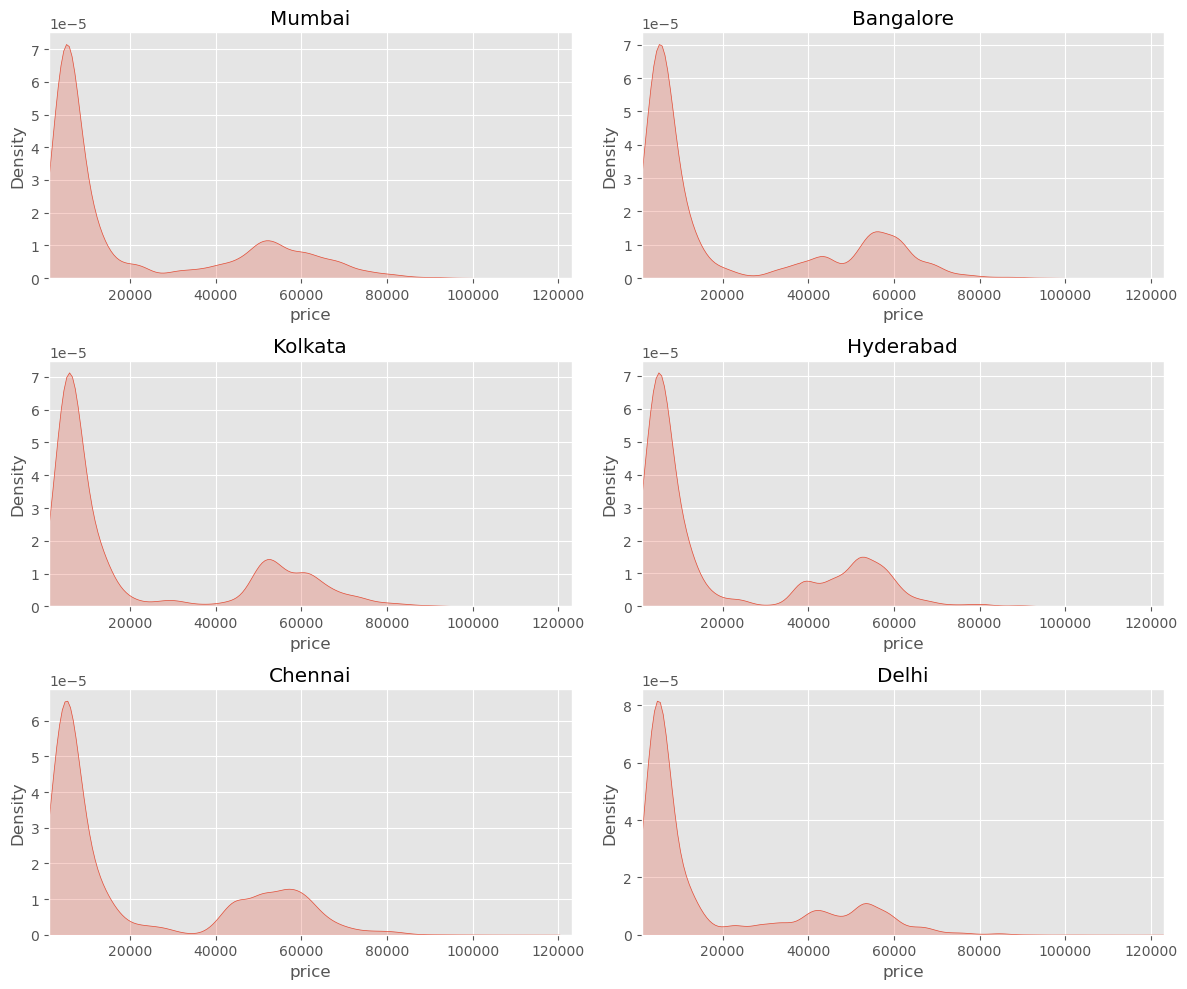

In [7]:
fig, axes = plt.subplots(3,2, figsize=(12,10))

destination_cities = df['destination_city'].unique()
for i, city in enumerate(destination_cities):
    city_df = df[df['destination_city'] == city]   
    sns.kdeplot(data=city_df, x='price',fill=True, ax=axes[i//2][i%2])
    axes[i//2][i%2].set_xlim(price_range)
    axes[i//2][i%2].set_title(city)
    
plt.tight_layout()

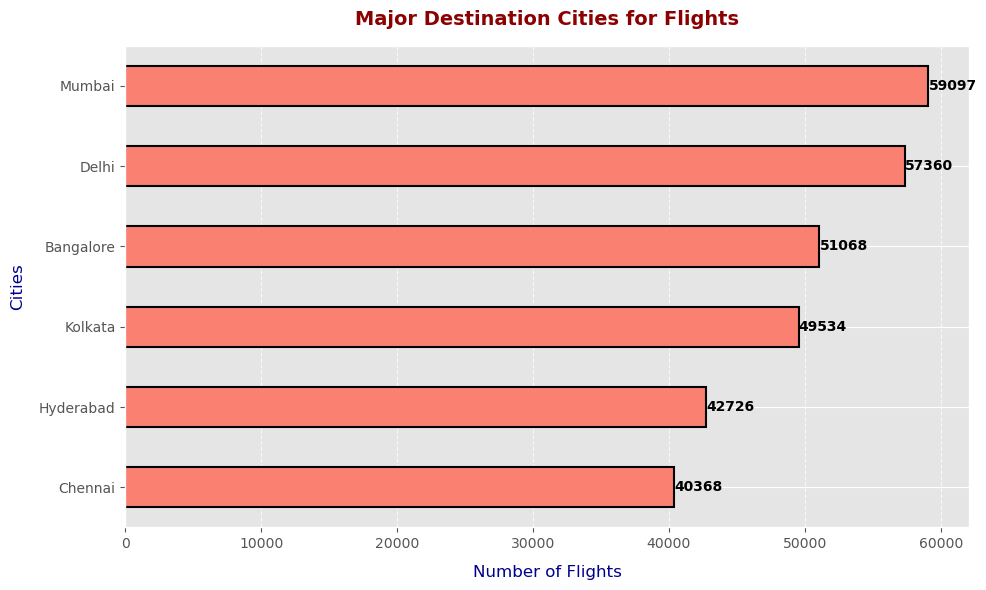

In [30]:
plt.figure(figsize=(10, 6))
ax = df['destination_city'].value_counts(ascending=True) \
                      .plot(kind='barh', color='salmon', edgecolor='black', linewidth=1.5)

plt.title("Major Destination Cities for Flights", fontsize=14, fontweight='bold', pad=15, color='darkred')
ax.set_xlabel("Number of Flights", fontsize=12, labelpad=10, color='darkblue')
ax.set_ylabel("Cities", fontsize=12, labelpad=10, color='darkblue')

plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(ax.patches):
    ax.text(v.get_width() + 10, v.get_y() + v.get_height()/2, f"{int(v.get_width())}", 
            ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


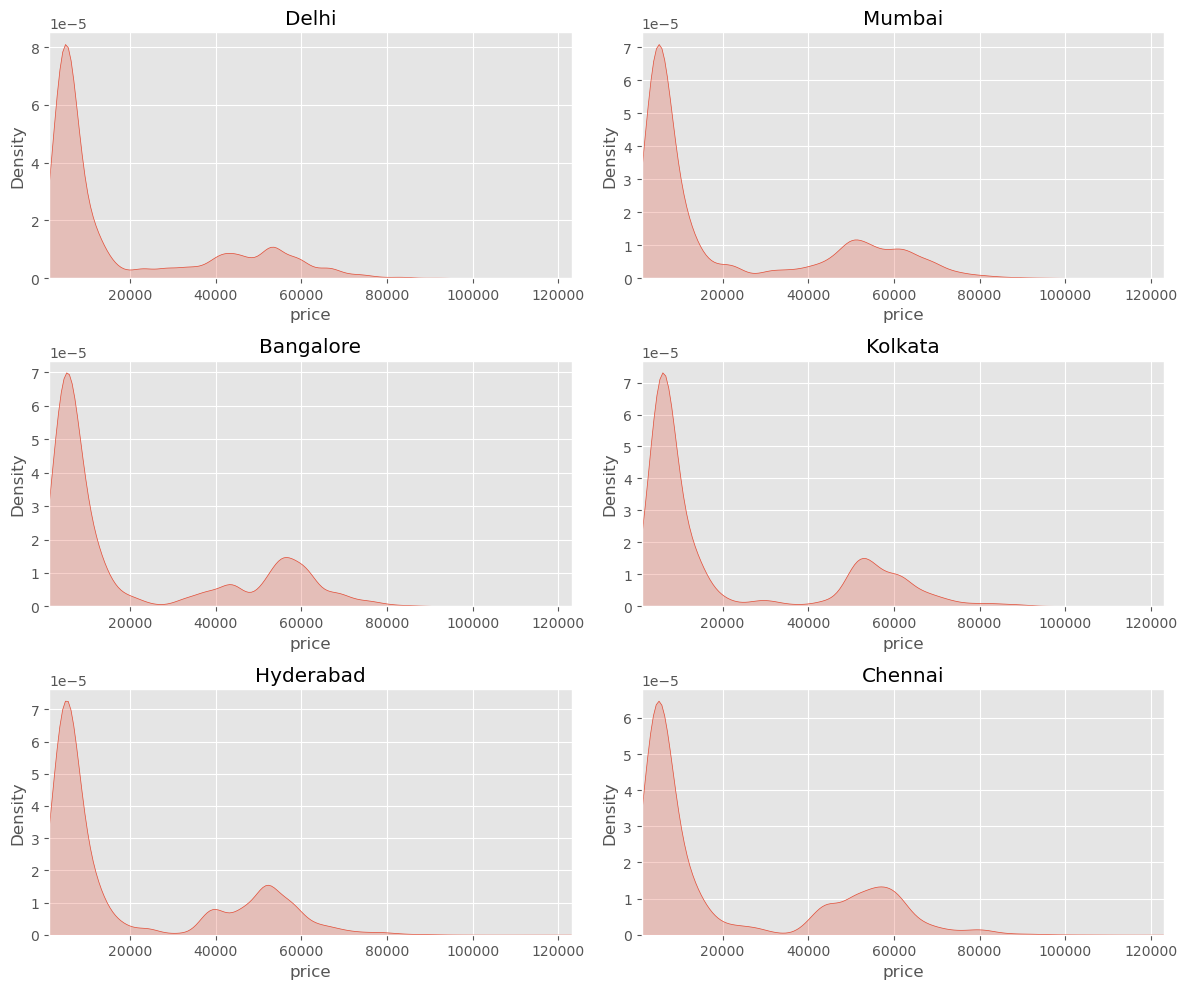

In [6]:
fig, axes = plt.subplots(3,2, figsize=(12,10))

source_cities = df['source_city'].unique()
for i, city in enumerate(source_cities):
    city_df = df[df['source_city'] == city]   
    sns.kdeplot(data=city_df, x='price',fill=True, ax=axes[i//2][i%2])
    axes[i//2][i%2].set_xlim(price_range)
    axes[i//2][i%2].set_title(city)
    
plt.tight_layout()

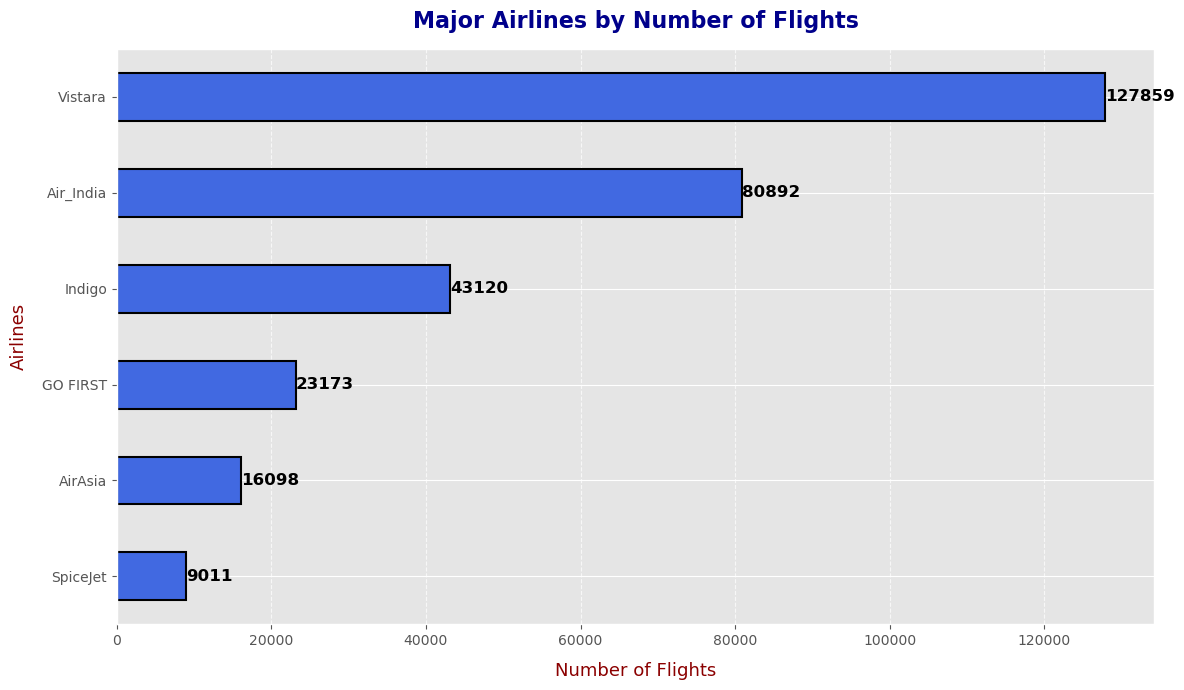

In [31]:
plt.figure(figsize=(12, 7))
ax = df['airline'].value_counts(ascending=True) \
                  .plot(kind='barh', color='royalblue', edgecolor='black', linewidth=1.5)

plt.title("Major Airlines by Number of Flights", fontsize=16, fontweight='bold', pad=15, color='darkblue')
ax.set_xlabel("Number of Flights", fontsize=13, labelpad=10, color='darkred')
ax.set_ylabel("Airlines", fontsize=13, labelpad=10, color='darkred')

plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(ax.patches):
    ax.text(v.get_width() + 10, v.get_y() + v.get_height()/2, f"{int(v.get_width())}", 
            ha='left', va='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

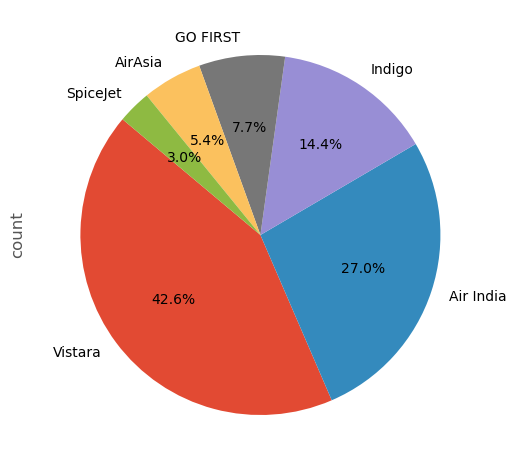

In [4]:
sizes = df['airline'].value_counts()
sizes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.tight_layout()

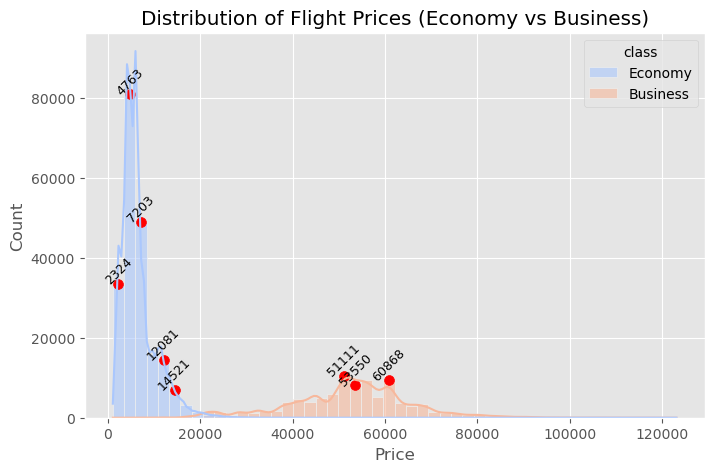

In [32]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df, x="price", hue="class", kde=True, bins=50, palette="coolwarm", alpha=0.6)

bin_heights = np.array([patch.get_height() for patch in ax.patches])
bin_edges = np.array([patch.get_x() for patch in ax.patches])
bin_width = ax.patches[0].get_width()

max_indices = np.argsort(bin_heights)[-10:]
peak_xs = bin_edges[max_indices] + bin_width / 2
peak_ys = bin_heights[max_indices]

# Filter out for better readability
min_distance = bin_width # minimum spacing
filtered_xs, filtered_ys = [], []

for x, y in zip(peak_xs, peak_ys):
    if not filtered_xs or all(abs(x - fx) > min_distance for fx in filtered_xs):
        filtered_xs.append(x)
        filtered_ys.append(y)

# Annotate
for x, y in zip(filtered_xs, filtered_ys):
    plt.text(x, y + 5, f"{int(x)}", ha="center", color="black", fontsize=9, rotation=45)
    plt.scatter(x, y, color="red", s=50, label="Maxima" if x == filtered_xs[0] else "")


plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Flight Prices (Economy vs Business)")
plt.show()

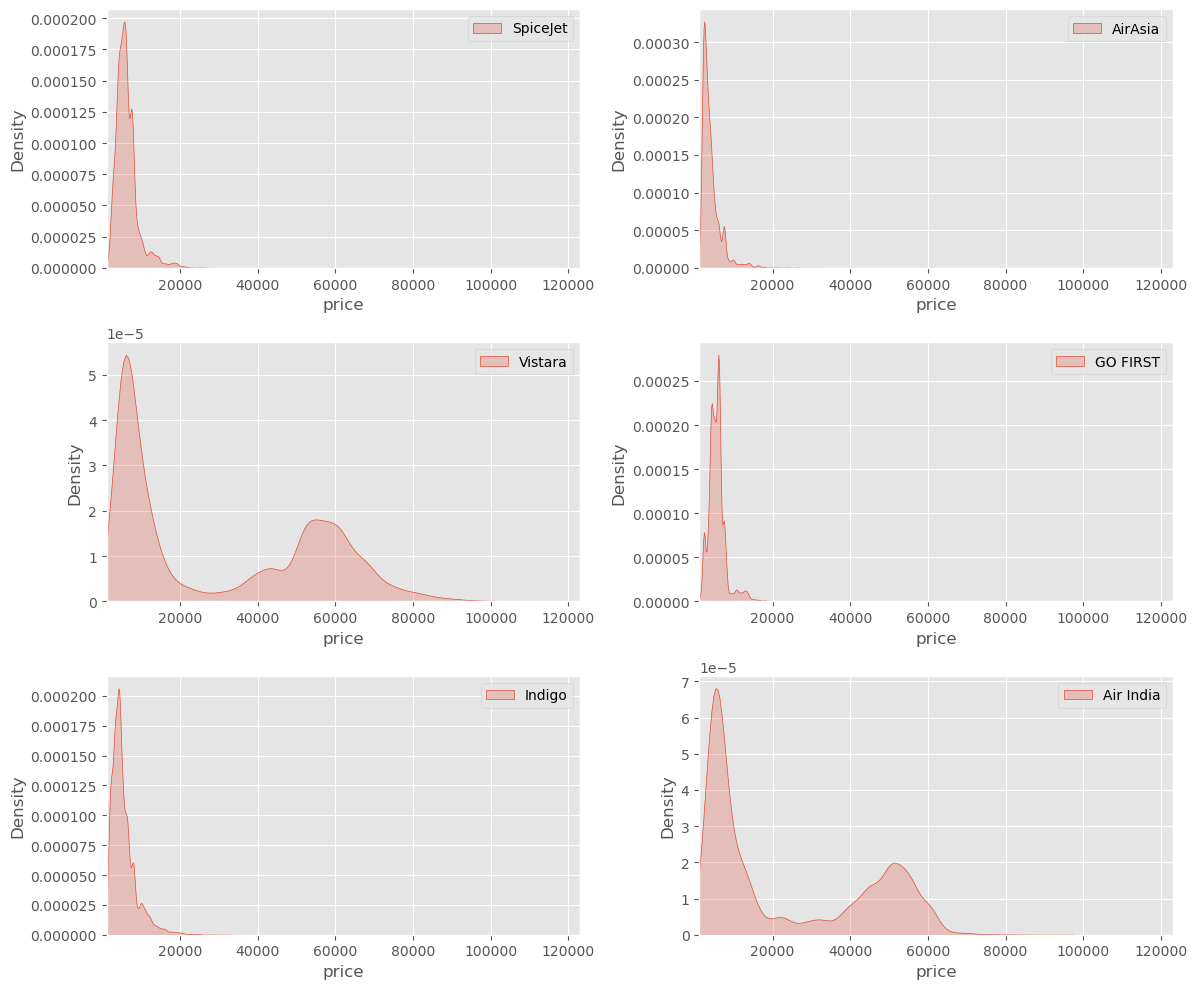

In [5]:
fig, axes = plt.subplots(3,2, figsize=(12,10))

# Set the same range for x-axis across all plots
price_range = (min(df['price']), max(df['price']))

airlines = df['airline'].unique()
for i, airline in enumerate(airlines):
    airline_df = df[df['airline'] == airline]   
    sns.kdeplot(data=airline_df, x='price',fill=True, ax=axes[i//2][i%2], label=airline)
    axes[i//2][i%2].set_xlim(price_range)
    axes[i//2][i%2].legend()
    
plt.tight_layout()

Skewness of Economy Price: 1.703332543731445
Skewness of Business Price: -0.09523708580664521


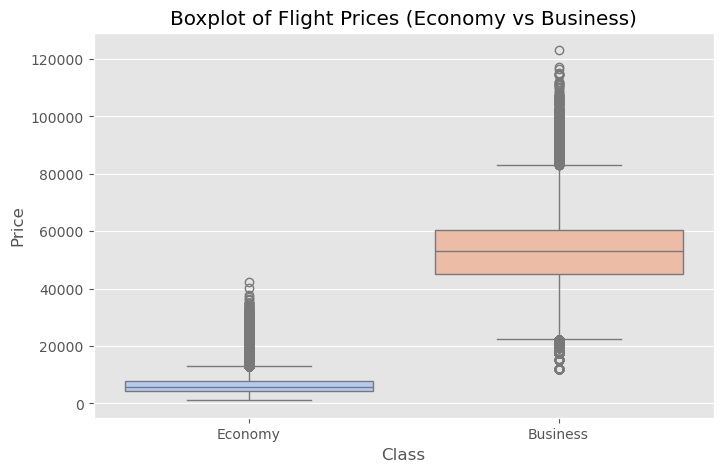

Statistics for Economy class tickets 

count    206666.000000
mean       6572.342383
std        3743.519517
min        1105.000000
25%        4173.000000
50%        5772.000000
75%        7746.000000
max       42349.000000
Name: price, dtype: float64

Statistics for Business class tickets 

count     93487.000000
mean      52540.081124
std       12969.314606
min       12000.000000
25%       45185.000000
50%       53164.000000
75%       60396.000000
max      123071.000000
Name: price, dtype: float64


In [33]:
print("Skewness of Economy Price:", df[df['class'] == 'Economy']['price'].skew())
print("Skewness of Business Price:", df[df['class'] == 'Business']['price'].skew())


plt.figure(figsize=(8,5))
sns.boxplot(x="class", y="price", data=df, hue="class", palette="coolwarm")
plt.title("Boxplot of Flight Prices (Economy vs Business)")
plt.xlabel("Class")
plt.ylabel("Price")
plt.show()

print("Statistics for Economy class tickets \n")
print(df[df['class'] == 'Economy']['price'].describe())
print("\nStatistics for Business class tickets \n")
print(df[df['class'] == 'Business']['price'].describe())

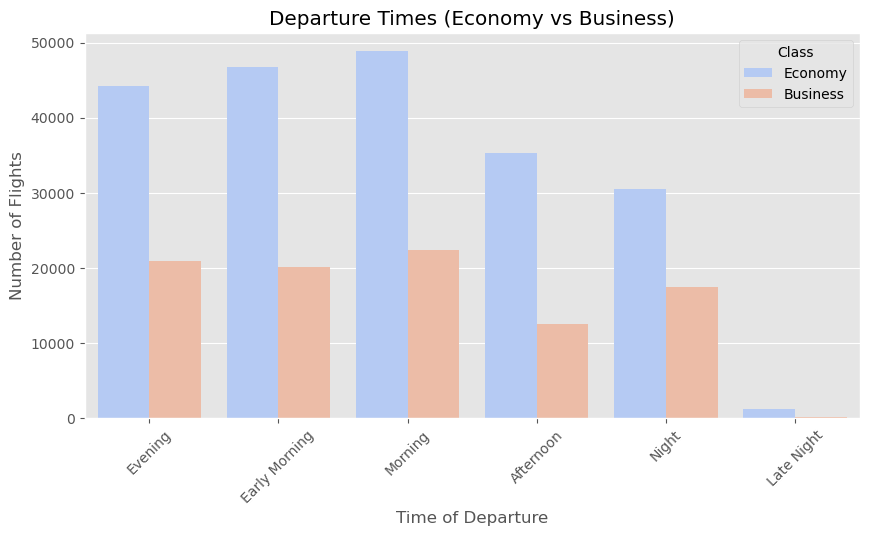

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="departure_time", hue="class", palette="coolwarm")

plt.xlabel("Time of Departure")
plt.ylabel("Number of Flights")
plt.title("Departure Times (Economy vs Business)")

plt.xticks(rotation=45)
plt.legend(title="Class")
plt.show()

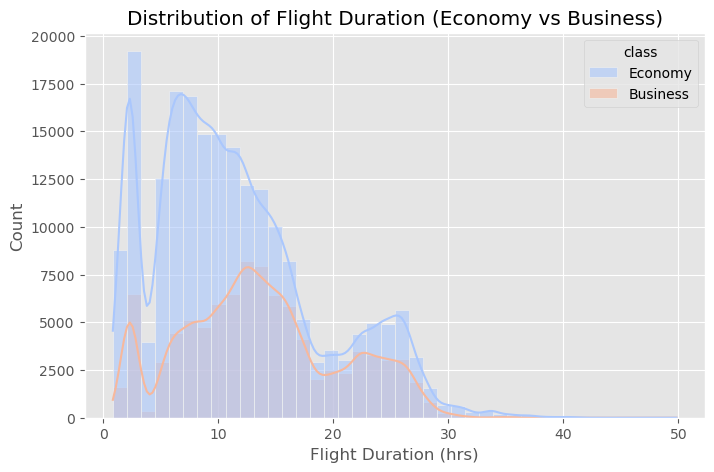

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df, x="duration", hue="class", kde=True, bins=40, palette="coolwarm", alpha=0.6)
plt.xlabel("Flight Duration (hrs)")
plt.ylabel("Count")
plt.title("Distribution of Flight Duration (Economy vs Business)")
plt.show()

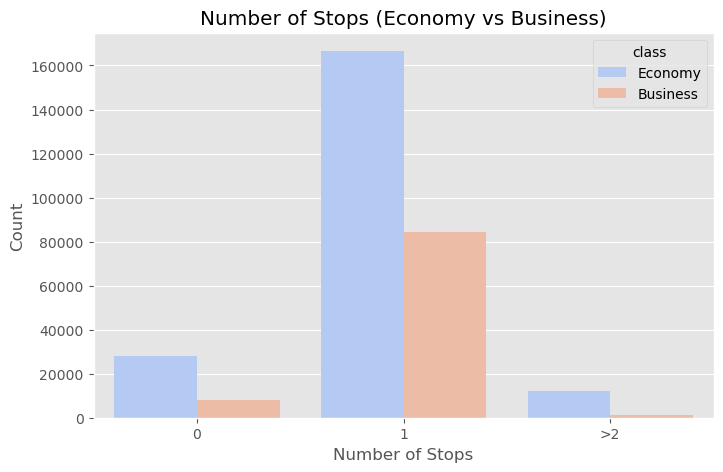

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["stops"], hue=df["class"], palette="coolwarm")
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.title("Number of Stops (Economy vs Business)")
plt.show()

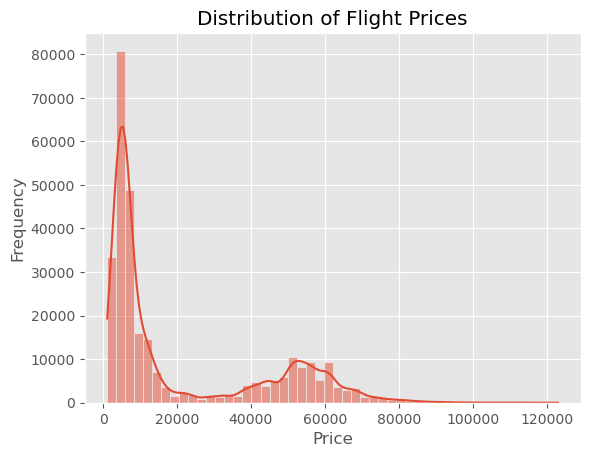

Skewness of Price: 1.0613772532064343


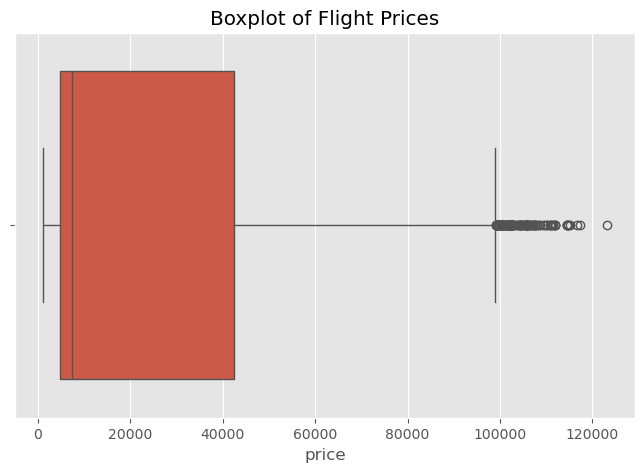

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


In [37]:
ax = sns.histplot(df['price'], bins=50, kde=True)

ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

ax.set_title('Distribution of Flight Prices')

plt.show()

print("Skewness of Price:", df['price'].skew())

plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Flight Prices")
plt.show()

print(df['price'].describe())

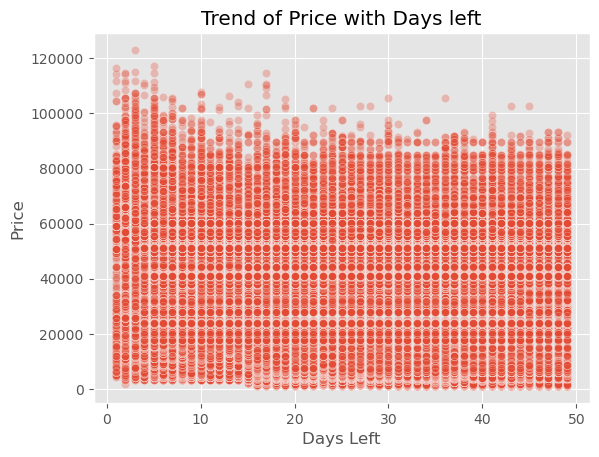

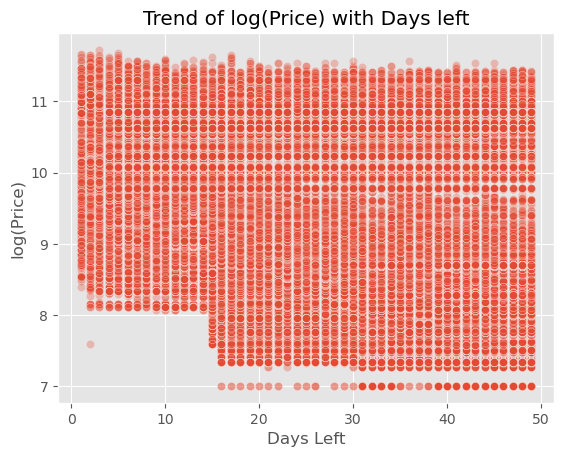

In [38]:
ax = sns.scatterplot(x=df['days_left'], y=df['price'], alpha=0.3)

ax.set_xlabel('Days Left')
ax.set_ylabel('Price')

ax.set_title('Trend of Price with Days left')

plt.show()

ax = sns.scatterplot(x=df['days_left'], y=np.log(df['price']), alpha=0.3)

ax.set_xlabel('Days Left')
ax.set_ylabel('log(Price)')

ax.set_title('Trend of log(Price) with Days left')

plt.show()


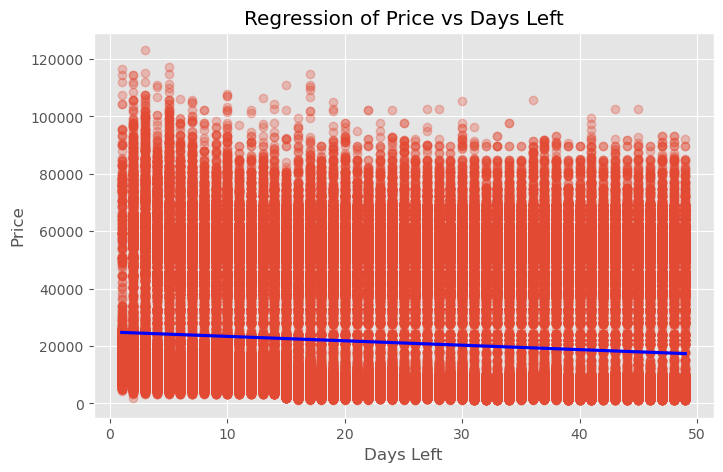

In [39]:
# Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=df['days_left'], y=df['price'], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Regression of Price vs Days Left')
plt.show()

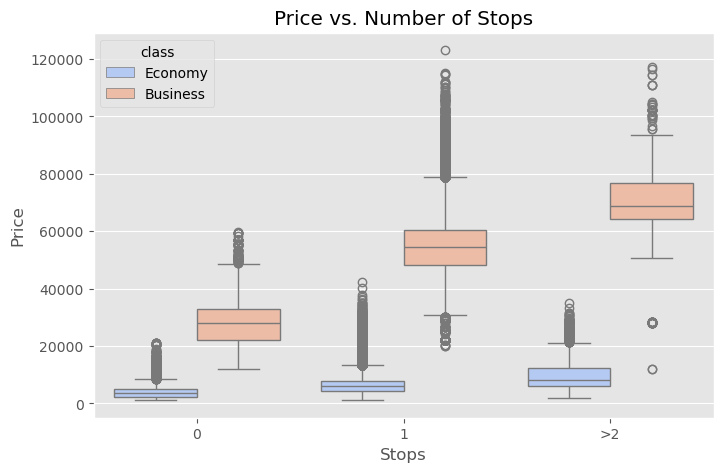

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["stops"], y=df["price"], data=df, hue="class", palette="coolwarm")
plt.title("Price vs. Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

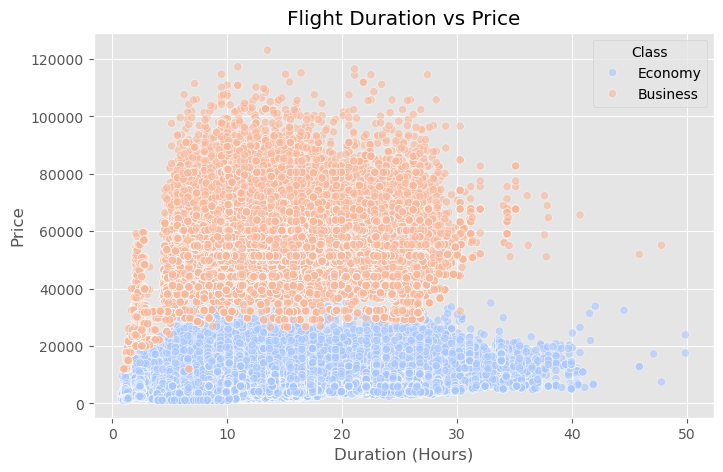

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['duration'], y=df['price'], hue=df['class'], alpha=0.6, palette="coolwarm")
plt.title("Flight Duration vs Price")
plt.xlabel("Duration (Hours)")
plt.ylabel("Price")
plt.legend(title="Class")
plt.show()

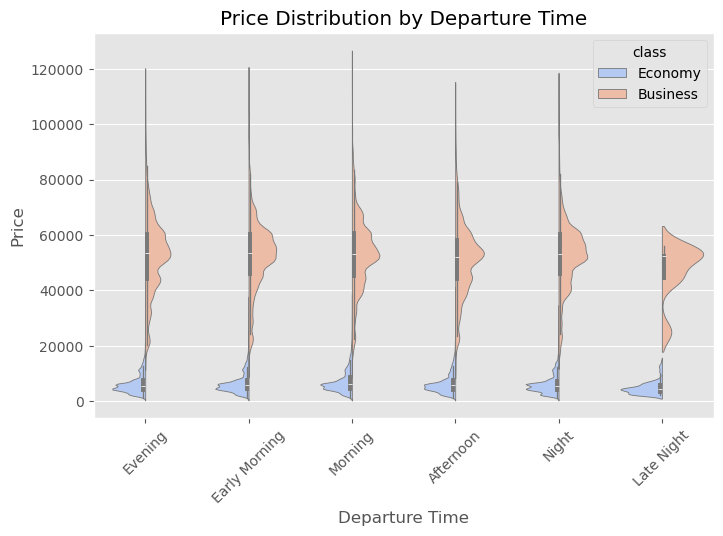

In [42]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df['departure_time'], y=df['price'], hue=df['class'], split=True, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Price Distribution by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

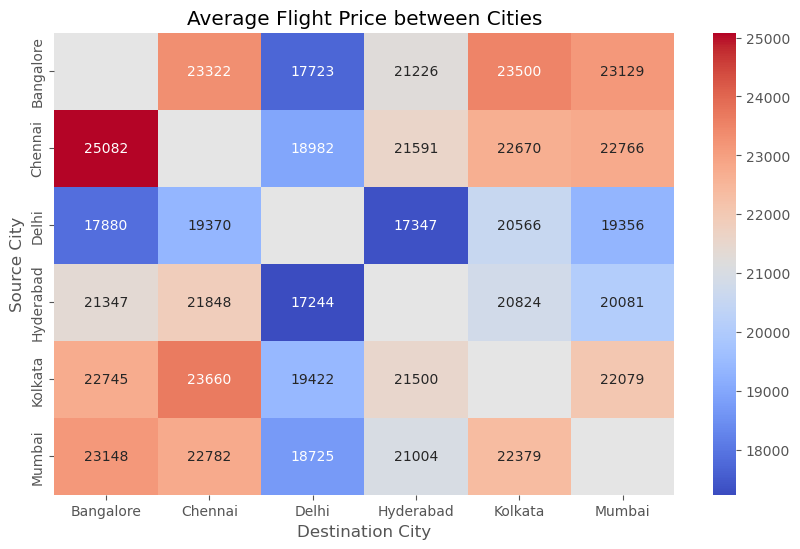

In [43]:
pivot_table = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Average Flight Price between Cities")
plt.xlabel("Destination City")
plt.ylabel("Source City")
plt.show()

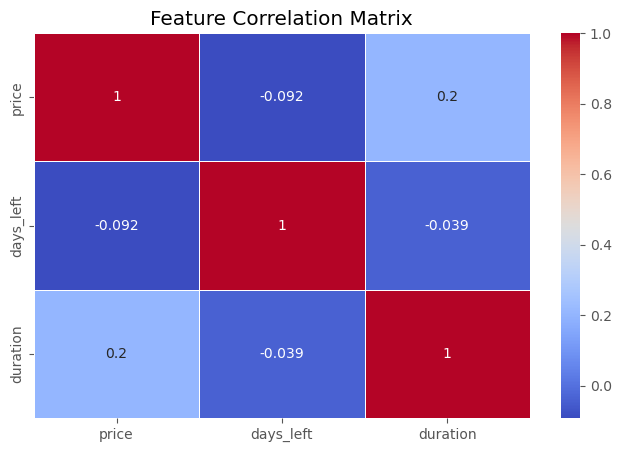

In [44]:
plt.figure(figsize=(8,5))

cols = ['price', 'days_left', 'duration']
corr_matrix = df[cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.show()